Below you can find the example code to register two images using Elastix

C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_bspline_multires_MR.txt -out results_test


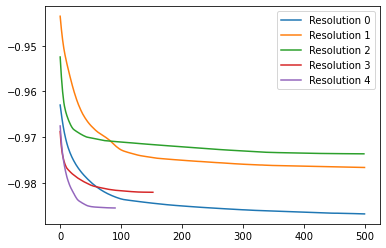

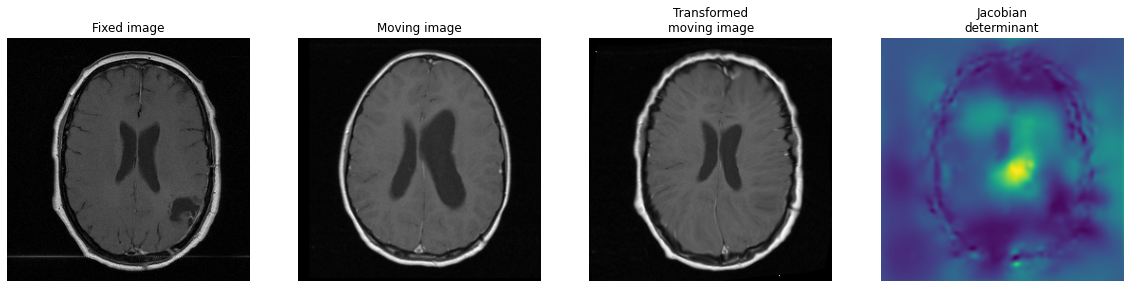

In [1]:
#! /usr/bin/env python
#
# Example script that shows how to preform the registration
%matplotlib inline

from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import SimpleITK as sitk

# IMPORTANT: these paths may differ on your system, depending on where
# Elastix has been installed. Please set accordingly.
ELASTIX_PATH = os.path.join(r'C:\Install Elastix\elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:\Install Elastix\transformix.exe')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

# Make a results directory if non exists
if os.path.exists('results_test') is False:
    os.mkdir('results_test')

# Define the paths to the two images you want to register
fixed_image_path = os.path.join('example_data', 'patient1.jpg')
moving_image_path = os.path.join('example_data', 'patient2.jpg')


# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Execute the registration. Make sure the paths below are correct, and
# that the results folder exists from where you are running this script
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join('example_data', 'parameters_bspline_multires_MR.txt')],
    output_dir='results_test')

# Find the results
transform_path = os.path.join('results_test', 'TransformParameters.0.txt')
result_path = os.path.join('results_test', 'result.0.tiff')

# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join('results_test', 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

# Load the fixed, moving, and result images
fixed_image = imageio.imread(fixed_image_path)[:, :, 0]
moving_image = imageio.imread(moving_image_path)[:, :, 0]
transformed_moving_image = imageio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

# Make a new transformix object tr with the CORRECT PATH to transformix
tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(moving_image_path, output_dir=r'results_test')

# Get the Jacobian matrix
jacobian_matrix_path = tr.jacobian_matrix(output_dir=r'results_test')

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=r'results_test')

# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=r'results_test')

# Add a plot of the Jacobian determinant (in this case, the file is a tiff file)
ax[3].imshow(imageio.imread(jacobian_determinant_path.replace('dcm', 'tiff')))
ax[3].set_title('Jacobian\ndeterminant')

# Show the plots
[x.set_axis_off() for x in ax]
plt.show()


Run this experiment by calling el.register in the regular manner with the two MR
brain images and this parameter file. Read the resulting values of the cost function from
the IterationInfo.x.txt files. You can load the values using the log = elastix.logfile(
Iteration_file_path) command. Then plot the cost values against the iteration number
as plt.plot(log[’itnr’], log[’metric’]), where plt is the matplotlib.pyplot package
(import matplotlib.pyplot as plt). You can set a title string to identify each plot e.g.
plt.title(’plot title’). You should see a function with a clear minimum in the centre
of the cost curve.


In [15]:
%matplotlib inline

from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import SimpleITK as sitk

# define elastix and transformix paths
ELASTIX_PATH = os.path.join(r'C:\Install Elastix\elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:\Install Elastix\transformix.exe')

# define paths to images to register
fixed_image_path = os.path.join('example_data', 'patient1.jpg')
moving_image_path = os.path.join('example_data', 'patient2.jpg')
parameters_path = os.path.join('example_data', 'parameters_samplespace_MR.txt')

# Make a results directory if non exists
results_path = 'results_2feb'
if os.path.exists(results_path) is False:
    os.mkdir(results_path)

# Define Elastix interface
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)    

# Execute the registration
el.register(
            fixed_image = fixed_image_path,
            moving_image =  moving_image_path,
            parameters = [parameters_path],
            output_dir = results_path)



C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_samplespace_MR.txt -out results_2feb


Text(0.5, 1.0, 'Cost over iterations')

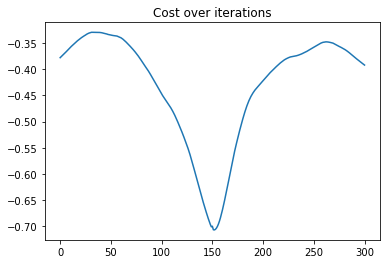

In [16]:
# Read the resulting values of the cost function
log = elastix.logfile(os.path.join(results_path, 'IterationInfo.0.R0.txt'))
plt.figure()
plt.plot(log['itnr'], log['metric'])
plt.title('Cost over iterations')

# took 8.023 secs

Execute registration again, but now use subsampling for computing the cost function. Use GRID

C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_samplespace_MR.txt -out results_2feb_grid


Text(0.5, 1.0, 'Cost over iterations')

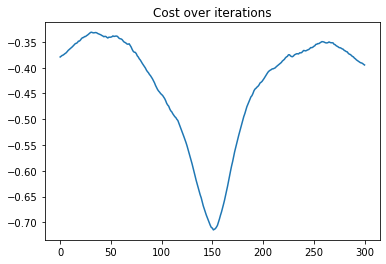

In [14]:
# Make a results directory if non exists
results_path = 'results_2feb_grid'
if os.path.exists(results_path) is False:
    os.mkdir(results_path)
    
# execute registration again, now using subsampling for computing the cost function
el.register(
            fixed_image = fixed_image_path,
            moving_image =  moving_image_path,
            parameters = [parameters_path],
            output_dir = results_path)

# Read the resulting values of the cost function
log = elastix.logfile(os.path.join(results_path, 'IterationInfo.0.R0.txt'))
plt.figure()
plt.plot(log['itnr'], log['metric'])
plt.title('Cost over iterations')

# took 0.955 s

Execute registration gain, now using random subsampling whilest computing the cost function

C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_samplespace_MR.txt -out results_2feb


Text(0.5, 1.0, 'Cost over iterations')

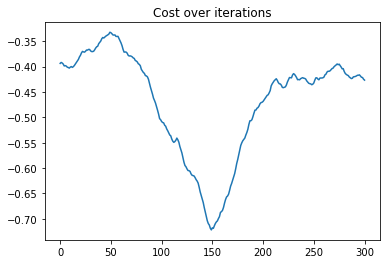

In [11]:
# Make a results directory if non exists
results_path = 'results_2feb_random'
if os.path.exists(results_path) is False:
    os.mkdir(results_path)
    
# execute registration again, now using subsampling for computing the cost function
el.register(
            fixed_image = fixed_image_path,
            moving_image =  moving_image_path,
            parameters = [parameters_path],
            output_dir = results_path)

# Read the resulting values of the cost function
log = elastix.logfile(os.path.join(results_path, 'IterationInfo.0.R0.txt'))
plt.figure()
plt.plot(log['itnr'], log['metric'])
plt.title('Cost over iterations')


# took 0.315 seconds

How do sampling strategies compare? (in terms of effect on cost function and computation time?) 

Computing the cost 
- using the full grid: most computation time (8 s) and smoothest cost function
- using 3x3 grid: computation time already reduced to <1 s and still a smooth cost function
- using random sampling: computation time very low (0.3 s) and a somewhat noisy cost function

# B-spine grid spacing

## setting final grid spacings to 64, 32, 16, 8 and 4

In [44]:
# Make a results directory if non exists
results_path_gen = 'results_2feb_Bspline_'
spacings = np.array([64, 32, 16, 8, 4])
#parameters_path_gen = 
print(parameters_path_gen)

for i in range(len(spacings)):
    results_path = results_path_gen + (str(spacings[i]))
    parameters_path = os.path.join('example_data', 'parameters_bspline_MR_' + str(spacings[i]) + '.txt') 
    print(parameters_path)
    print(results_path)
    if os.path.exists(results_path) is False:
        os.mkdir(results_path)
    
    # execute registration again, now using subsampling for computing the cost function
    el.register(
                fixed_image = fixed_image_path,
                moving_image =  moving_image_path,
                parameters = [parameters_path],
                output_dir = results_path)

example_data\parameters_bspline_MR_

example_data\parameters_bspline_MR_64.txt

results_2feb_Bspline_64
C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_bspline_MR_64.txt -out results_2feb_Bspline_64

example_data\parameters_bspline_MR_32.txt

results_2feb_Bspline_32
C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_bspline_MR_32.txt -out results_2feb_Bspline_32

example_data\parameters_bspline_MR_16.txt

results_2feb_Bspline_16
C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_bspline_MR_16.txt -out results_2feb_Bspline_16

example_data\parameters_bspline_MR_8.txt

results_2feb_Bspline_8
C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_bspline_MR_8.txt -out results_2feb_Bspline_8

example_data\parameters_bspline_MR_4.txt

r

Influence of spacing on the outcome images: 
- The lower the 'FinalGridSpacingInPhysicalUnits' the larger the artefacts/noise on the resulting registrated image


# Multi-resolution registration

How many resolutions are used? 
- 5 res

Can you detect a difference between the multiresolution result and outcomes in the single res experiments? 
- Yes, the multiresolution results seems better registrated in comparison to the single resolution results

Why? 
- 


C:\Install Elastix\elastix.exe -f example_data\patient1.jpg -m example_data\patient2.jpg -p example_data\parameters_samplespace2_MR.txt -out results_2feb_multires_2


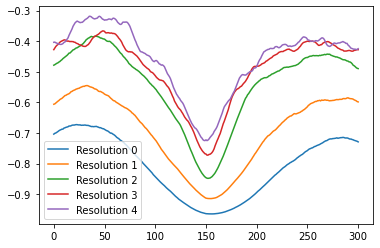

In [45]:
# Make a results directory if non exists
results_path = 'results_2feb_multires_2'
if os.path.exists(results_path) is False:
    os.mkdir(results_path)
    
# 
parameters_path = os.path.join( 'example_data','parameters_samplespace2_MR.txt')
    
# execute registration again, now using subsampling for computing the cost function
el.register(
            fixed_image = fixed_image_path,
            moving_image =  moving_image_path,
            parameters = [parameters_path],
            output_dir = results_path)


# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join(results_path, 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])


# Penalty terms, jacobian

A deformation modelled with B-splines is often called a free-form deformation, because the
B-spline model does not restrict the deformation. The method is free to deform the image in
any way (well, almost). In contrast, a deformation model like a biomechanical model restricts
the deformation to behave according to the physical properties defined by the biomechanical
model. The free nature of B-spline modelling can result in very unrealistic deformations, for
instance, containing folding of tissue. A way to resolve is this is to include a penalty term in
the cost function

Read in the fixed and moving images in folder chest_xrays. These are in raw and mhd format,
which requires a different reading routine2. The .mhd files are pure text header files that
contain properties of the images. For instance you can read these properties with with open(’
chest_ct.mhd’) as fp: [print(line) for line in fp]. You can also use the SimpleITK package
to load an image in array format by itk_image = sitk.ReadImage(’example_data/chest_ct.mhd
’); image_array = sitk.GetArrayFromImage(itk_image), and then visualize it using plt.imshow(
image_array,cmap=’gray’); plt.show().

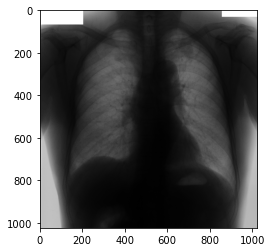

In [2]:
%matplotlib inline

from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import SimpleITK as sitk

itk_image = sitk.ReadImage('example_data/chest_xrays/fixed_image.mhd')
image_array = sitk.GetArrayFromImage(itk_image)

plt.imshow(image_array, cmap= 'gray')
plt.show()

Register the fixed and moving image using parameters.txt. View the resulting image.
It should give you the impression of a radiologist high on crack.

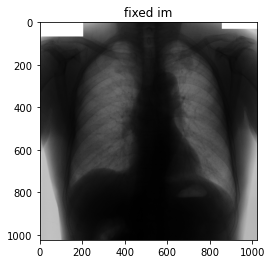

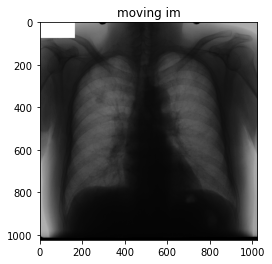

In [3]:

itk_image = sitk.ReadImage('example_data/chest_xrays/fixed_image.mhd')
image_fixed= sitk.GetArrayFromImage(itk_image)

itk_image = sitk.ReadImage('example_data/chest_xrays/moving_image.mhd')
image_moving = sitk.GetArrayFromImage(itk_image)

plt.figure()
plt.imshow(image_fixed, cmap= 'gray')
plt.title('fixed im')

plt.figure()
plt.imshow(image_moving, cmap= 'gray')
plt.title('moving im')

plt.show()




In [5]:
# Make a results directory if non exists
results_path = 'results_8feb_xrays'
if os.path.exists(results_path) is False:
    os.mkdir(results_path)
    
parameters_path = os.path.join('example_data', 'chest_xrays' , 'parameters.txt' )

imageio.imwrite('example_data/chest_xrays/chest_fixed.jpg', image_fixed)
imageio.imwrite('example_data/chest_xrays/chest_moving.jpg', image_moving)



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [7]:
# define elastix and transformix paths
ELASTIX_PATH = os.path.join(r'C:\Install Elastix\elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:\Install Elastix\transformix.exe')

# Define Elastix interface
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)    

# execute registration again, now using subsampling for computing the cost function
el.register(
            fixed_image = os.path.join('example_data', 'chest_xrays' , 'chest_fixed.jpg'),
            moving_image =  os.path.join('example_data', 'chest_xrays' , 'chest_moving.jpg'),
            parameters = [parameters_path],
            output_dir = results_path)



C:\Install Elastix\elastix.exe -f example_data\chest_xrays\chest_fixed.jpg -m example_data\chest_xrays\chest_moving.jpg -p example_data\chest_xrays\parameters.txt -out results_8feb_xrays


Text(0.5, 1.0, 'Cost over iterations')

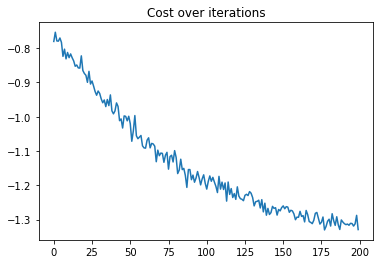

In [8]:
# Read the resulting values of the cost function
log = elastix.logfile(os.path.join(results_path, 'IterationInfo.0.R0.txt'))
plt.figure()
plt.plot(log['itnr'], log['metric'])
plt.title('Cost over iterations')

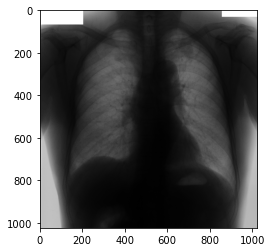

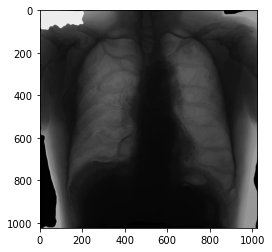

In [11]:
result_path = os.path.join('results_8feb_xrays', 'result.0.mhd')
itk_image = sitk.ReadImage(result_path)
image_moving_reg = sitk.GetArrayFromImage(itk_image)

plt.figure()
plt.imshow(image_fixed, cmap = 'gray')

plt.figure()
plt.imshow(image_moving_reg, cmap = 'gray')

plt.show()